In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("../Data/GoodReads_100k_books.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         100000 non-null  int64  
 9   rating        100000 non-null  float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


In [4]:
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.drop('isbn13', axis=1, inplace=True)

In [7]:
df_new = df.dropna()

In [8]:
df.shape

(100000, 12)

In [9]:
df_new.shape

(73049, 12)

In [10]:
df_new.drop(columns=['pages'], inplace=True)

C:\Users\mradu\AppData\Local\Temp\ipykernel_1820\1006860906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['pages'], inplace=True)


In [ ]:
df_new['genre'] = df_new['genre'].str.replace(r",[^,]*\.\.\.$", "", regex=True).str.replace(r"\.\.\.$", "", regex=True).str.strip()

C:\Users\mradu\AppData\Local\Temp\ipykernel_1820\2216963129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['genre'] = df_new['genre'].str.replace(r",[^,]*\.\.\.$", "", regex=True).str.replace(r"\.\.\.$", "", regex=True).str.strip()


In [12]:
all_genres = []
for genre_str in df_new['genre']:
    genres = [g.strip() for g in genre_str.split(',')]
    all_genres.extend(genres)

In [13]:
df_new['genre_list'] = df_new['genre'].apply(lambda x: [g.strip() for g in str(x).split(',')])

C:\Users\mradu\AppData\Local\Temp\ipykernel_1820\1459964968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['genre_list'] = df_new['genre'].apply(lambda x: [g.strip() for g in str(x).split(',')])


In [ ]:
df_new = df_new[~df_new['title'].duplicated(keep=False)].reset_index(drop=True)

In [ ]:
rows_with_ellipsis = df_new[df_new['genre_list'].apply(lambda genres: '...' in genres)]
print(rows_with_ellipsis)


Empty DataFrame
Columns: [author, bookformat, desc, genre, img, isbn, link, rating, reviews, title, totalratings, genre_list]
Index: []


In [16]:
df_new['genre_list'].head(5)

0    [History, Military History, Civil War, America...
1      [Couture, Fashion, Historical, Art, Nonfiction]
2                                  [Politics, History]
3                                     [Labor, History]
4    [Business, Leadership, Romance, Historical Rom...
Name: genre_list, dtype: object

C:\Users\mradu\AppData\Local\Temp\ipykernel_1820\1079227887.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_common_genre_series.values, y=most_common_genre_series.index, palette='viridis')


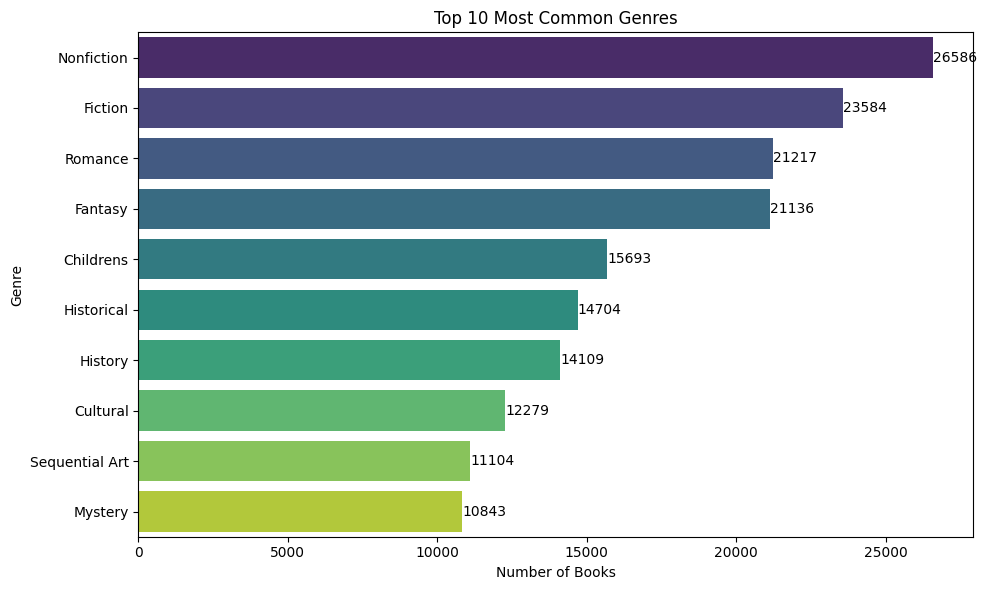

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

all_genres = []
for genre_str in df_new['genre']:
    genres = [g.strip() for g in genre_str.split(',')]
    all_genres.extend(genres)

genre_counts = Counter(all_genres)

most_common_genre = genre_counts.most_common(10)

most_common_genre_series = pd.Series(dict(most_common_genre)).sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=most_common_genre_series.values, y=most_common_genre_series.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')

for i, v in enumerate(most_common_genre_series.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

In [18]:
df_new['genre'] = df_new['genre'].str.replace(r"\.\.\.", "", regex=True).str.strip()


In [ ]:
all_genres = []
for genre_str in df_new['genre']:
    genres = [g.strip() for g in genre_str.split(',')]
    genres = [g for g in genres if g != '...']
    all_genres.extend(genres)


In [ ]:
df_new['genre'] = df_new['genre'].str.replace('...', '', regex=False)
df_new['genre'] = df_new['genre'].str.replace(r'\s+,', ',', regex=True) 

In [21]:
print("Count of '...' in genre column:", df_new['genre'].str.contains(r"\.\.\.").sum())

Count of '...' in genre column: 0


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70687 entries, 0 to 70686
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        70687 non-null  object 
 1   bookformat    70687 non-null  object 
 2   desc          70687 non-null  object 
 3   genre         70687 non-null  object 
 4   img           70687 non-null  object 
 5   isbn          70687 non-null  object 
 6   link          70687 non-null  object 
 7   rating        70687 non-null  float64
 8   reviews       70687 non-null  int64  
 9   title         70687 non-null  object 
 10  totalratings  70687 non-null  int64  
 11  genre_list    70687 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 6.5+ MB


In [23]:
df_new.drop('link', axis=1, inplace=True)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70687 entries, 0 to 70686
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        70687 non-null  object 
 1   bookformat    70687 non-null  object 
 2   desc          70687 non-null  object 
 3   genre         70687 non-null  object 
 4   img           70687 non-null  object 
 5   isbn          70687 non-null  object 
 6   rating        70687 non-null  float64
 7   reviews       70687 non-null  int64  
 8   title         70687 non-null  object 
 9   totalratings  70687 non-null  int64  
 10  genre_list    70687 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.9+ MB


In [25]:
df_new.to_csv("../Data/GoodReads_100k_books_cleaned.csv", index=False)

In [26]:
df_amit = df_new.copy()

In [27]:
df_amit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70687 entries, 0 to 70686
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        70687 non-null  object 
 1   bookformat    70687 non-null  object 
 2   desc          70687 non-null  object 
 3   genre         70687 non-null  object 
 4   img           70687 non-null  object 
 5   isbn          70687 non-null  object 
 6   rating        70687 non-null  float64
 7   reviews       70687 non-null  int64  
 8   title         70687 non-null  object 
 9   totalratings  70687 non-null  int64  
 10  genre_list    70687 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.9+ MB


In [28]:
df_amit.drop(columns=['genre_list', 'reviews'], inplace=True)

In [29]:
df_amit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70687 entries, 0 to 70686
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        70687 non-null  object 
 1   bookformat    70687 non-null  object 
 2   desc          70687 non-null  object 
 3   genre         70687 non-null  object 
 4   img           70687 non-null  object 
 5   isbn          70687 non-null  object 
 6   rating        70687 non-null  float64
 7   title         70687 non-null  object 
 8   totalratings  70687 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 4.9+ MB


In [31]:
df_amit.to_csv("../Data/GoodReads_100k_books_cleaned_amit.csv", index=False)

In [ ]:
duplicate_titles = df_amit[df_amit.duplicated('title', keep=False)]

print("Duplicate Titles:")
print(duplicate_titles[['title']])


Duplicate Titles:
Empty DataFrame
Columns: [title]
Index: []


In [ ]:
duplicate_title_names = df_amit['title'][df_amit['title'].duplicated(keep=False)].unique()

print("Duplicate Title Names:")
print(duplicate_title_names)


Duplicate Title Names:
[]


In [34]:
df_amit.shape

(70687, 9)